In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.2 kB/s 
     |████████████████████████████████| 6.6 MB 20.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 389 kB 8.7 MB/s 
     |████████████████████████████████| 185 kB 60.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.16-cp37-cp37m-lin

In [1]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

#Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.18.0
11.1
GCC 7.5


In [2]:
!ls
#!mkdir checkpoints
# !wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
#       -O mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
%cd mmdetection/
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth \
      -O mmdetection/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth \
      -O mmdetection/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth

!mkdir data
%cd data
!mkdir coco
%cd coco
!wget -c http://images.cocodataset.org/zips/train2017.zip
!wget -c http://images.cocodataset.org/zips/val2017.zip
!wget -c http://images.cocodataset.org/zips/test2017.zip
#!wget -c http://images.cocodataset.org/zips/unlabeled2017.zip
!unzip train2017.zip
!unzip val2017.zip
!unzip test2017.zip
#!unzip unlabeled2017.zip
!rm train2017.zip
!rm val2017.zip
!rm test2017.zip
!rm unlabeled2017.zip 

!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget -c http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!wget -c http://images.cocodataset.org/annotations/image_info_test2017.zip

!unzip annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!unzip image_info_test2017.zip

!rm annotations_trainval2017.zip
!rm stuff_annotations_trainval2017.zip
!rm image_info_test2017.zip
#rm image_info_unlabeled2017.zip
%cd ..
%cd ..



Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000400877.jpg  
 extracting: test2017/000000144748.jpg  
 extracting: test2017/000000170237.jpg  
 extracting: test2017/000000567624.jpg  
 extracting: test2017/000000290172.jpg  
 extracting: test2017/000000314235.jpg  
 extracting: test2017/000000442739.jpg  
 extracting: test2017/000000384593.jpg  
 extracting: test2017/000000518532.jpg  
 extracting: test2017/000000144104.jpg  
 extracting: test2017/000000110569.jpg  
 extracting: test2017/000000118841.jpg  
 extracting: test2017/000000377253.jpg  
 extracting: test2017/000000237196.jpg  
 extracting: test2017/000000078972.jpg  
 extracting: test2017/000000269672.jpg  
 extracting: test2017/000000457073.jpg  
 extracting: test2017/000000031534.jpg  
 extracting: test2017/000000270349.jpg  
 extracting: test2017/000000119340.jpg  
 extracting: test2017/000000491104.jpg  
 extracting: test2017/000000299990.jpg  
 extracting: test2017/000000066343.jpg  
 extra

In [3]:
%cd mmdetection
!ls

/content/mmdetection
CITATION.cff  docs	   mmdet	    README.md	      resources  tools
configs       docs_zh-CN   mmdet.egg-info   README_zh-CN.md   setup.cfg
demo	      LICENSE	   model-index.yml  requirements      setup.py
docker	      MANIFEST.in  pytest.ini	    requirements.txt  tests


In [5]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth \
      -O checkpoints/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth
# Choose to use a config and initialize the detector
config_original = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
config = 'configs/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py'
# Setup a checkpoint file to load
checkpoint_original = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
checkpoint = 'checkpoints/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth'
# initialize the detector
model_original = init_detector(config_original, checkpoint_original, device='cuda:0')
model = init_detector(config, checkpoint, device='cuda:0')

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-28 04:13:15--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

--2021-10-28 04:13:16--  https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

Use load_from_local loader
Use load_from_local loader


In [7]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)
result_original = inference_detector(model_original, img)

/content/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


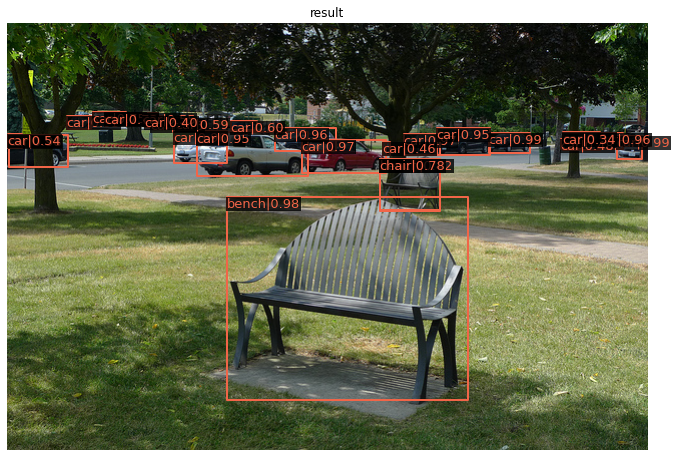

In [8]:
# Let's plot the result
show_result_pyplot(model_original, img, result_original, score_thr=0.3)

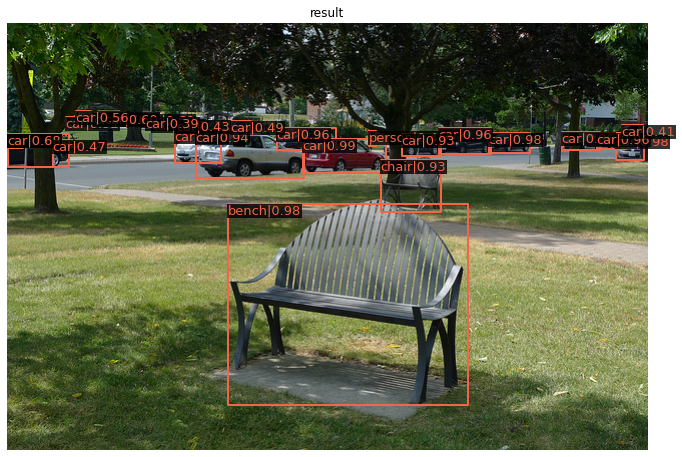

In [9]:
# Let's plot the result
show_result_pyplot(model, img, result_original, score_thr=0.3)

In [ ]:
#%cd mmdetection
!ls
!python tools/test.py \
    configs/dcn/faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py \
    faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth \
    --out results.pkl \
    --show

CITATION.cff						       model-index.yml
configs							       pytest.ini
data							       README.md
demo							       README_zh-CN.md
docker							       requirements
docs							       requirements.txt
docs_zh-CN						       resources
faster_rcnn_r50_fpn_dconv_1x_results			       results.pkl
faster_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-d68aed1e.pth  setup.cfg
LICENSE							       setup.py
MANIFEST.in						       tests
mmdet							       tools
mmdet.egg-info						       val2017.zip
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/1, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` wou

In [ ]:
# Sanity test
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

!python tools/test.py \
    configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py \
    checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
    --out faster_results.pkl \
    --eval proposal_fast

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-22 16:32:17--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.225
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.225|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/5000, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anc

In [3]:
#dconv faster rcnn r50 mdpool
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_mdpool_1x_coco/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth \
      -O checkpoints/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth
!python tools/test.py \
    configs/dcn/faster_rcnn_r50_fpn_mdpool_1x_coco.py \
    checkpoints/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth \
    --eval bbox

'''
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.594
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.418
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.414
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.493
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.519
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.519
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.558
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.652
'''

--2021-10-26 16:41:19--  https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r50_fpn_mdpool_1x_coco/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 597574270 (570M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth’

checkpoints/faster_ 100%[===================>] 569.89M  10.3MB/s    in 64s     

2021-10-26 16:42:24 (8.93 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_mdpool_1x_coco_20200307-c0df27ff.pth’ saved [597574270/597574270]

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator

In [3]:
#dconv mask rcnn r50 mdpool
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth \
      -O checkpoints/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth
!python tools/test.py \
    configs/dcn/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py \
    checkpoints/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth \
    --eval bbox

--2021-10-28 15:50:49--  https://download.openmmlab.com/mmdetection/v2.0/dcn/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180190569 (172M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth’

checkpoints/mask_rc 100%[===================>] 171.84M  9.79MB/s    in 16s     

2021-10-28 15:51:06 (10.8 MB/s) - ‘checkpoints/mask_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200203-4d9ad43b.pth’ saved [180190569/180190569]

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
Use load_from_local loader
[>>] 5000/5000, 8.7 task/s, elapsed: 575s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.54s)
creating index...
index 

In [5]:
#dconv cascade rcnn r50 mdpool
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-2f1fca44.pth \
      -O checkpoints/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-2f1fca44.pth
!python tools/test.py \
    configs/dcn/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py \
    checkpoints/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-2f1fca44.pth \
    --eval bbox

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-28 16:10:52--  https://download.openmmlab.com/mmdetection/v2.0/dcn/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco_20200130-2f1fca44.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
Use load_from_local loader
[>>] 5000/5000, 9.8 task/s, elapsed: 508s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.59s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=30.36s).
Accumulating evaluation results...
DONE (t=4.83s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.438
 Average Prec

In [6]:
#dconv faster rcnn r101
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth \
      -O checkpoints/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth
!python tools/test.py \
    configs/dcn/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco.py \
    checkpoints/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth \
    --eval bbox

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-28 16:20:10--  https://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248670750 (237M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth’

checkpoints/faster_ 100%[===================>] 237.15M  10.3MB/s    in 26s     

2021-10-28 16:20:37 (9.22 MB/s) - ‘checkpoints/faster_rcnn_r101_fpn_dconv_c3-c5_1x_coco_20200203-1377f13d.pth’ saved [248670750/248670750]

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
Use load_from_local loader
[>>] 5000/5000, 8.5 task/s, elapsed: 592s, ETA:     0s
Evaluating bbox...
Lo

In [7]:
#cascade rcnn r50
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth \
      -O checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth
!python tools/test.py \
    configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco.py \
    checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth \
    --eval bbox

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-28 16:31:16--  https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277858723 (265M) [application/octet-stream]
Saving to: ‘checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth’

checkpoints/cascade 100%[===================>] 264.99M  8.60MB/s    in 28s     

2021-10-28 16:31:46 (9.54 MB/s) - ‘checkpoints/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth’ saved [277858723/277858723]

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
Use load_from_local loader
[>>] 5000/5000, 10.7 task/s, elapsed: 468s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t

In [8]:
#mask rcnn r50
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth \
      -O checkpoints/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
!python tools/test.py \
    configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py \
    checkpoints/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth \
    --eval bbox

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-10-28 16:40:23--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.78
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177862517 (170M) [application/octet-stream]
Saving to: ‘checkpoints/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth’

checkpoints/mask_rc 100%[===================>] 169.62M  10.7MB/s    in 18s     

2021-10-28 16:40:43 (9.29 MB/s) - ‘checkpoints/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth’ saved [177862517/177862517]

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
Use load_from_local loader
[>>] 5000/5000, 9.3 task/s, elapsed: 538s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.60s)
creating